<a href="https://colab.research.google.com/github/soapycat99/cs_4410/blob/main/gridSearchCV_and_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd

In [2]:
iris = load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [16]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [40]:
k_range = range(1,31,2)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X, y, cv=10)
  k_scores.append(scores.mean())
  print(f'k={k:<2} ; mean_accuracy={scores.mean():.2%}; standard deviation={scores.std():.2%}')

k=1  ; mean_accuracy=96.00%; standard deviation=5.33%
k=3  ; mean_accuracy=96.67%; standard deviation=4.47%
k=5  ; mean_accuracy=96.67%; standard deviation=4.47%
k=7  ; mean_accuracy=96.67%; standard deviation=4.47%
k=9  ; mean_accuracy=97.33%; standard deviation=3.27%
k=11 ; mean_accuracy=96.67%; standard deviation=4.47%
k=13 ; mean_accuracy=98.00%; standard deviation=3.06%
k=15 ; mean_accuracy=97.33%; standard deviation=3.27%
k=17 ; mean_accuracy=97.33%; standard deviation=3.27%
k=19 ; mean_accuracy=97.33%; standard deviation=3.27%
k=21 ; mean_accuracy=96.67%; standard deviation=3.33%
k=23 ; mean_accuracy=97.33%; standard deviation=3.27%
k=25 ; mean_accuracy=96.67%; standard deviation=3.33%
k=27 ; mean_accuracy=96.67%; standard deviation=4.47%
k=29 ; mean_accuracy=95.33%; standard deviation=4.27%


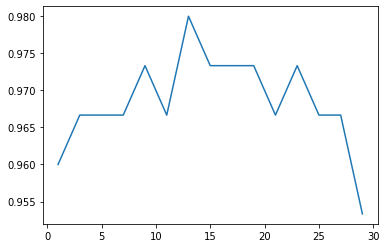

In [42]:
import seaborn as sn
sn.lineplot(x=k_range, y=k_scores)

In [48]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np

knn = KNeighborsClassifier()
grid_param = {'n_neighbors' : np.arange(1,31,2)}

In [50]:
knn_param_search = GridSearchCV(knn, grid_param, cv=10)

In [51]:
knn_param_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
knn_param_search.best_params_

{'n_neighbors': 9}

In [58]:
knn_param_search.best_score_

0.975

In [62]:
knn_param_search.cv_results_

{'mean_fit_time': array([0.00048072, 0.00045395, 0.0004194 , 0.00041246, 0.00048404,
        0.00043559, 0.00045848, 0.00041394, 0.00040622, 0.00044549,
        0.00045712, 0.00040946, 0.00040562, 0.00041029, 0.0004225 ]),
 'mean_score_time': array([0.00127413, 0.0012444 , 0.00119689, 0.0011497 , 0.001371  ,
        0.00119512, 0.00123115, 0.00128863, 0.00124815, 0.00120373,
        0.00129707, 0.0012074 , 0.00122852, 0.00120049, 0.00134993]),
 'mean_test_score': array([0.95833333, 0.95833333, 0.96666667, 0.96666667, 0.975     ,
        0.95      , 0.94166667, 0.93333333, 0.94166667, 0.93333333,
        0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},


In [69]:
test_score = pd.Series(knn_param_search.cv_results_['mean_test_score'])
param = pd.Series(grid_param['n_neighbors'])

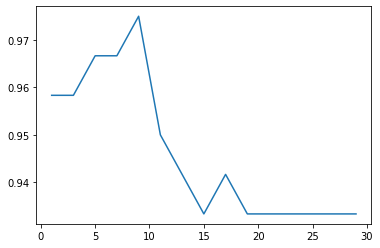

In [71]:
sn.lineplot( x=param, y=test_score)